In [73]:
#Dicas:

#O que quer recomendar?
#Alinhe com o gestor de produtos/comercial
#Teste !!!

In [74]:
# Frameworks

# Modelagem de dados
import pandas as pd # Dados
import numpy as np # Matrizes

# Analises graficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Ajustes no pandas
pd.set_option('display.max_rows', 100 ) # Linhas
pd.set_option('display.max_columns', 50 ) # Colunas
 
# Ajustes no matplot
plt.rcParams['figure.figsize'] = (15, 6)  # Tamanho do gráfico
plt.style.use('seaborn-darkgrid') # Estilo do gráfico

In [75]:
# Ler os dados
Dados_Livros = pd.read_csv('Books.csv')
Dados_Avaliacao = pd.read_csv('Ratings.csv')
Dados_Usuario = pd.read_csv('Users.csv')

# Dimensçao [ Linhas, Colunas ]
Dados_Livros.shape, Dados_Avaliacao.shape, Dados_Usuario.shape

((271360, 8), (1149780, 3), (278858, 3))

In [76]:
# Primeiras Linhas
Dados_Livros.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [77]:
# Info
Dados_Livros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [78]:
# Verificando
Dados_Avaliacao.head()  # Avaliação de 0 até 10

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [79]:
# Info
Dados_Avaliacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [80]:
# Verficando
Dados_Usuario.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [81]:
# Info
Dados_Usuario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [82]:
# Cruzamentos dos dados

# 1º Cruzamento
Tab_Cruzada = Dados_Livros.merge( Dados_Avaliacao, how='inner', on='ISBN')

# 2º Cruzamento
Tab_Cruzada = Tab_Cruzada.merge( Dados_Usuario, how='inner', on='User-ID')

# Dimensão
Tab_Cruzada.shape

(1031136, 12)

In [83]:
# Verificar
Tab_Cruzada.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN


In [84]:
# VErificar
Tab_Cruzada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031134 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031134 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031132 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Book-Rating          1031136 non-null  int64  
 10  Location             1031136 non-null  object 
 11  Age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 94.4+ MB


In [85]:
'''
  Investigação dos ruidos na base

  for Linha in Tab_Cruzada['Year-Of-Publication'].value_counts().index :
    print( Linha )

  Tab_Cruzada.loc[ Tab_Cruzada['Year-Of-Publication'] == 'DK Publishing Inc' ]

'''


# Ajustando o registro incorreto
Tab_Cruzada.iloc[ 287500, 3 ] = ''
Tab_Cruzada.iloc[ 352361, 3 ] = ''
Tab_Cruzada.iloc[ 467962, 3 ] = ''
Tab_Cruzada.iloc[ 469216, 3 ] = ''

# Conveter a coluna Ano
Tab_Cruzada['Year-Of-Publication'] = pd.to_numeric( Tab_Cruzada['Year-Of-Publication'] )

In [86]:
# Formato das Colunas
Tab_Cruzada.dtypes

ISBN                    object
Book-Title              object
Book-Author             object
Year-Of-Publication    float64
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
User-ID                  int64
Book-Rating              int64
Location                object
Age                    float64
dtype: object

In [87]:
# Verificando
Tab_Cruzada['Location'].head(5)

0    stockton, california, usa
1     timmins, ontario, canada
2     timmins, ontario, canada
3     timmins, ontario, canada
4     timmins, ontario, canada
Name: Location, dtype: object

In [88]:
# Verificando
Tab_Cruzada['Location'].tail(5)

1031131                       venice, florida, usa
1031132                   tioga, pennsylvania, usa
1031133                      madrid, madrid, spain
1031134                  grand prairie, texas, usa
1031135    bielefeld, nordrhein-westfalen, germany
Name: Location, dtype: object

In [89]:
# Tecnica de tratamento de texto
def Extrair_Pais( Regiao ):
  '''
    Função para extrair o nome do pais na coluna região
  '''
  # Incluindo a inforção
  Registro = Regiao
  # Fatiar
  Registro = Regiao.split(',')
  # Buscar
  Fracao = Registro[-1].upper()
  #Retorno
  return Fracao

# Criando a coluna
Tab_Cruzada['Pais'] = Tab_Cruzada['Location'].apply( Extrair_Pais )

# Verificando
Tab_Cruzada.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Pais
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,USA
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,CANADA
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN,CANADA
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN,CANADA
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN,CANADA


In [90]:
# Nulos
Tab_Cruzada.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 2
Year-Of-Publication         4
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
User-ID                     0
Book-Rating                 0
Location                    0
Age                    277835
Pais                        0
dtype: int64

In [91]:
# Unicos
Tab_Cruzada.nunique()
# Renomar as colunas
Tab_Cruzada.rename(
    columns={
        'Book-Title' : 'Titulo',
        'Book-Author' : 'Autor',
        'Year-Of-Publication' : 'Ano_Publicacao',
        'Publisher' : 'Editora',
        'User-ID' :'Id_Cliente',
        'Book-Rating' : 'Avaliacao',
        'Location' : 'Localizacao',
        'Age' : 'Idade'
    }, inplace=True
)

# Verificar
Tab_Cruzada.columns

Index(['ISBN', 'Titulo', 'Autor', 'Ano_Publicacao', 'Editora', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'Id_Cliente', 'Avaliacao', 'Localizacao',
       'Idade', 'Pais'],
      dtype='object')

In [92]:
# Analise descritiva
Tab_Cruzada.describe()

,Ano_Publicacao,Id_Cliente,Avaliacao,Idade
count,1.031132e+06,1.031136e+06,1.031136e+06,753301.000000
mean,1.968195e+03,1.405945e+05,2.839051e+00,37.397648
std,2.311015e+02,8.052466e+04,3.854157e+00,14.098254
min,0.000000e+00,2.000000e+00,0.000000e+00,0.000000
25%,1.992000e+03,7.041500e+04,0.000000e+00,28.000000
50%,1.997000e+03,1.412100e+05,0.000000e+00,35.000000
75%,2.001000e+03,2.114260e+05,7.000000e+00,45.000000
max,2.050000e+03,2.788540e+05,1.000000e+01,244.000000


In [93]:
# Remover as avaliações zeradas
Tab_Cruzada = Tab_Cruzada.loc[ Tab_Cruzada['Avaliacao'] > 0 ]

# Veriicar
Tab_Cruzada.isnull().sum(), Tab_Cruzada.shape

(ISBN                   0
 Titulo                 0
 Autor                  2
 Ano_Publicacao         1
 Editora                2
 Image-URL-S            0
 Image-URL-M            0
 Image-URL-L            1
 Id_Cliente             0
 Avaliacao              0
 Localizacao            0
 Idade             114221
 Pais                   0
 dtype: int64,
 (383842, 13))

In [94]:
# Verificar
Tab_Cruzada['Avaliacao'].describe()

count    383842.000000
mean          7.626701
std           1.841339
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Avaliacao, dtype: float64

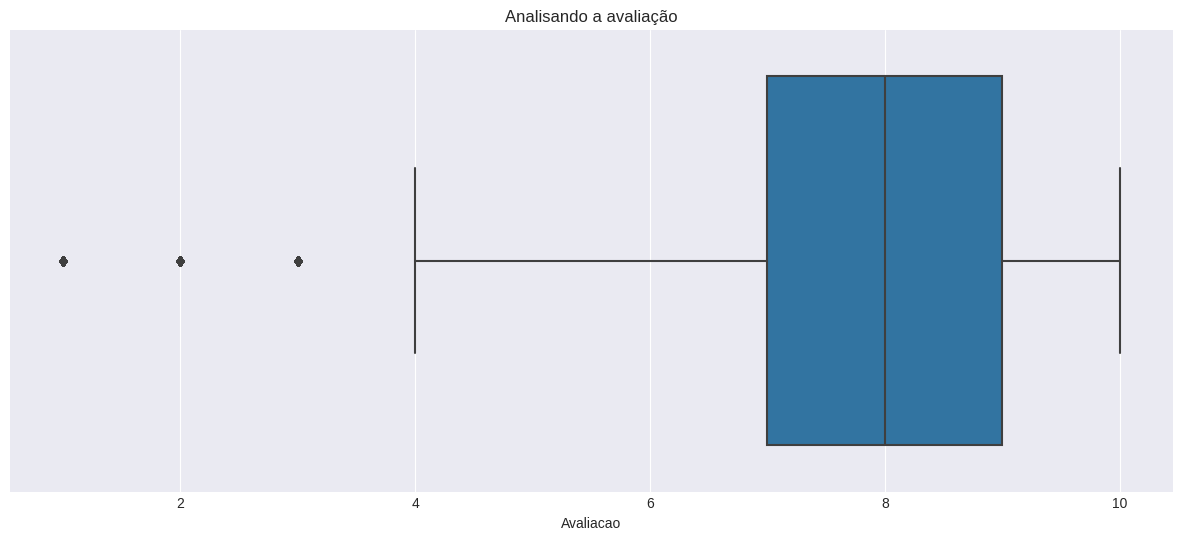

In [95]:
# Analise grafica
plt.title('Analisando a avaliação')
sns.boxplot( data=Tab_Cruzada, x='Avaliacao');

In [96]:
# Analise
Analise = Tab_Cruzada.groupby( by=['Titulo'] ).agg(
    Quantidade = ('Titulo', 'count'),
    Media = ('Avaliacao', 'mean'),
    Max = ('Avaliacao', 'max'),
    Min = ('Avaliacao', 'min'),
    Mediana = ('Avaliacao', 'median'),
)

# Verificando
Analise.head()

,Quantidade,Media,Max,Min,Mediana
Titulo,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1,9.000000,9,9,9.0
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000,8,8,8.0
Dark Justice,1,10.000000,10,10,10.0
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7,7.142857,10,1,7.0
Final Fantasy Anthology: Official Strategy Guide (Brady Games),2,10.000000,10,10,10.0


In [97]:
# Verificar
Analise.sort_values('Quantidade', ascending=False ).head()
# Vericar
Analise.sort_values(['Media', 'Quantidade' ], ascending=False ).head()

,Quantidade,Media,Max,Min,Mediana
Titulo,,,,,
Postmarked Yesteryear: 30 Rare Holiday Postcards,11,10.0,10,10,10.0
The Sneetches and Other Stories,8,10.0,10,10,10.0
Natural California: A Postcard Book,7,10.0,10,10,10.0
Uncle John's Supremely Satisfying Bathroom Reader (Uncle John's Bathroom Reader),7,10.0,10,10,10.0
"Oh, the Thinks You Can Think! (I Can Read It All by Myself Beginner Books)",6,10.0,10,10,10.0


In [98]:
# Analise Qtd x Avaliacao

px.scatter(
    # Dados
    data_frame=Analise,
    # Parametros
    x='Quantidade', y='Media',
    # Titulo
    title='Média x Quantidade - Titulos',
    # Upgrade
    # marginal_y='rug', marginal_x='histogram'
)

In [99]:
# Correlação
Analise.corr()

,Quantidade,Media,Max,Min,Mediana
Quantidade,1.000000,0.018880,0.175572,-0.251497,0.036604
Media,0.018880,1.000000,0.889722,0.842385,0.989839
Max,0.175572,0.889722,1.000000,0.530760,0.887792
Min,-0.251497,0.842385,0.530760,1.000000,0.804023
Mediana,0.036604,0.989839,0.887792,0.804023,1.000000


In [100]:
# Analise
Analise['Quantidade'].describe()

count    135567.000000
mean          2.831382
std           9.135691
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         707.000000
Name: Quantidade, dtype: float64

In [101]:
#
# Modelagem de dados
import pandas as pd # Dados
import numpy as np # Matrizes

# Analises graficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
def Classificao_Quantidade( Quantidade ):
  
  '''
    Agrupar a quantidade
  '''

  if int( Quantidade ) <= 5:
    return '1-5 Avaliações'

  elif int( Quantidade) <=10:
    return '6-10 Avaliações'

  elif int(Quantidade) <= 50:
    return '11-50 Avaliações'

  elif int(Quantidade) <= 100:
    return '51-100 Avaliações'

  else:
    return '>101 Avaliações'

# Aplicação
Pizza = Analise['Quantidade'].apply( Classificao_Quantidade ).value_counts( normalize=True )

# Tranformar em um DataFrame
Pizza = pd.DataFrame( Pizza ).reset_index()

# Plot
px.pie(
    # DAdos
    data_frame=Pizza,
    # Paramewtros
    names='Quantidade', values='proportion',
    # Titulo
    title='Divisão das Quantidades'
)

In [102]:
# Verificando
Pizza

,Quantidade,proportion
0,1-5 Avaliações,0.920010
1,6-10 Avaliações,0.042783
2,11-50 Avaliações,0.032589
3,51-100 Avaliações,0.003201
4,>101 Avaliações,0.001416


In [103]:
# Publicação
Anlaise_Ano = Tab_Cruzada['Ano_Publicacao'].value_counts().sort_index().reset_index()

# Verificando
Anlaise_Ano.describe()

,Ano_Publicacao,count
count,105.000000,105.000000
mean,1934.028571,3655.628571
std,210.090432,8051.797181
min,0.000000,1.000000
25%,1937.000000,4.000000
50%,1963.000000,63.000000
75%,1989.000000,1652.000000
max,2050.000000,37986.000000


<BarContainer object of 18 artists>

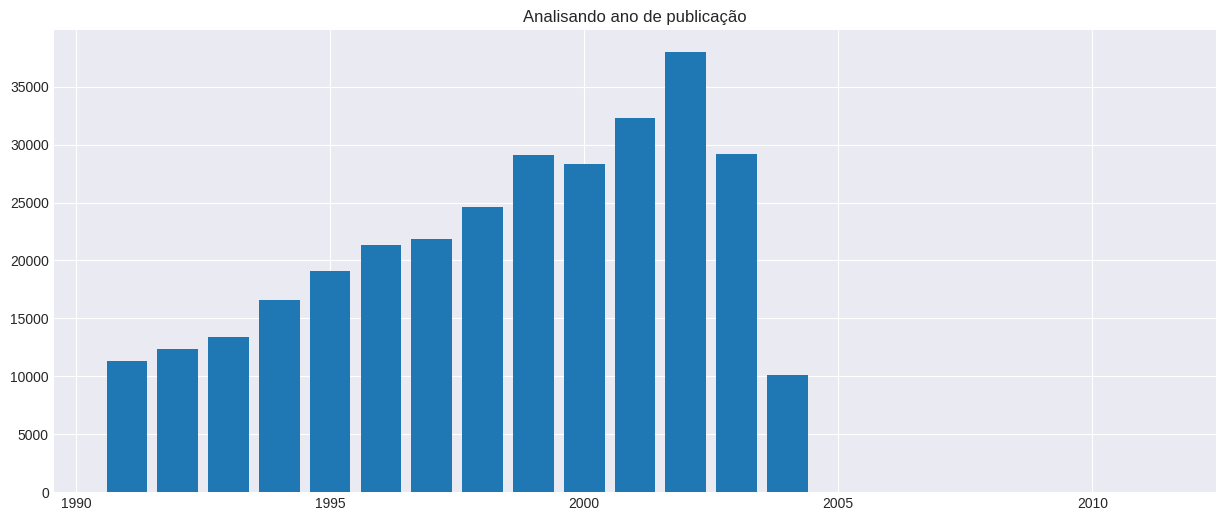

In [107]:
# Plot

# Filtrando o ano
Filtro = Anlaise_Ano.loc[ (Anlaise_Ano['Ano_Publicacao'] > 1990) & ( Anlaise_Ano['Ano_Publicacao'] < 2020 ) ]

# Plot
plt.title('Analisando ano de publicação')
plt.bar( Filtro['Ano_Publicacao'], Filtro['count'] )

In [108]:
Tab_Cruzada.columns

Index(['ISBN', 'Titulo', 'Autor', 'Ano_Publicacao', 'Editora', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'Id_Cliente', 'Avaliacao', 'Localizacao',
       'Idade', 'Pais'],
      dtype='object')

In [110]:
# Ranikg dos Autores
Tab_Cruzada.groupby(by='Autor').agg(
    Quantidade = ('Avaliacao','count'),
    Media = ('Avaliacao','mean'),
).sort_values('Quantidade', ascending=False).head(10)

,Quantidade,Media
Autor,,
Stephen King,4639,7.815046
Nora Roberts,2938,7.629680
John Grisham,2550,7.523137
James Patterson,2387,7.697947
J. K. Rowling,1746,8.970218
Mary Higgins Clark,1677,7.503280
Janet Evanovich,1490,7.944966
Dean R. Koontz,1475,7.572203
Anne Rice,1245,7.387952


In [111]:
# Regiao
Tab_Cruzada['Pais'].value_counts(normalize=True).head(10)*100

Pais
 USA               68.378135
 CANADA             9.267876
 UNITED KINGDOM     3.854190
 GERMANY            3.165625
                    2.737845
 SPAIN              1.874990
 AUSTRALIA          1.821322
 N/A                1.811943
 FRANCE             1.207789
 PORTUGAL           0.897505
Name: proportion, dtype: float64

In [112]:
# Concentração das avaliações
Tab_Cruzada['Pais'].value_counts(normalize=True).cumsum().head(10)*100

Pais
 USA               68.378135
 CANADA            77.646011
 UNITED KINGDOM    81.500201
 GERMANY           84.665826
                   87.403671
 SPAIN             89.278662
 AUSTRALIA         91.099984
 N/A               92.911927
 FRANCE            94.119716
 PORTUGAL          95.017221
Name: proportion, dtype: float64

<Axes: title={'center': 'Analise de idades'}, xlabel='Idade'>

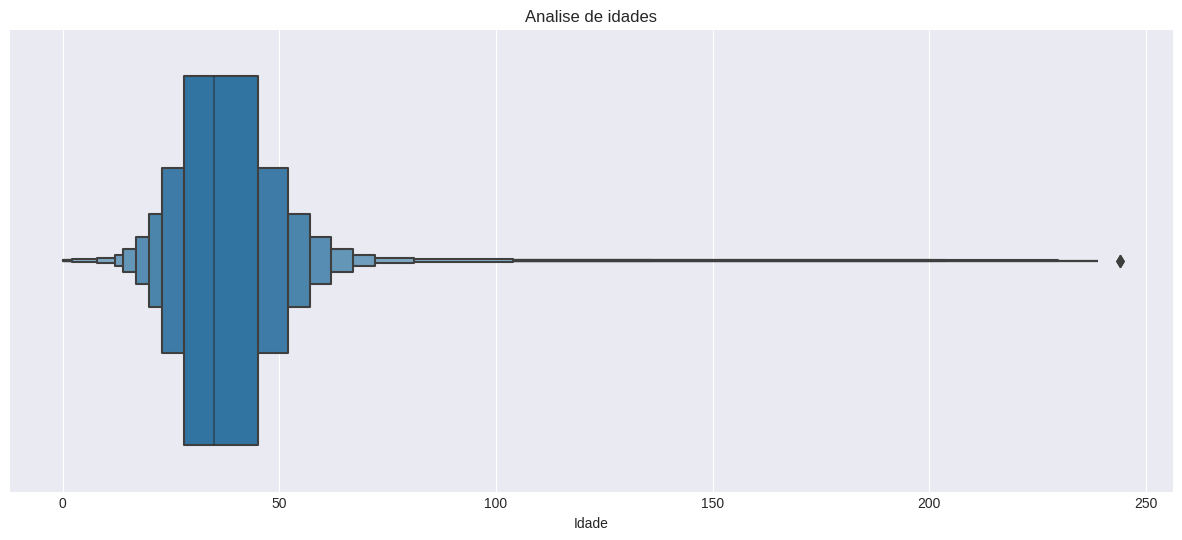

In [114]:
# Idade
plt.title('Analise de idades')
sns.boxenplot(data=Tab_Cruzada, x='Idade')

In [117]:
#Ajustar ( Avaliaçao dos Livros --> Tab_Cruzada )

#Ajustando a Tabela de Avaliacoes
Avaliacoes = Analise.reset_index().iloc[:, 0:2]

# Cruzando os dados
Tab_Final = Tab_Cruzada.merge(Avaliacoes, how='inner', on='Titulo')

#Verificando
Tab_Final.head()


,ISBN,Titulo,Autor,Ano_Publicacao,Editora,Image-URL-S,Image-URL-M,Image-URL-L,Id_Cliente,Avaliacao,Localizacao,Idade,Pais,Quantidade
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,CANADA,9
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",NaN,N/A,9
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544,8,"toronto, ontario, canada",30.0,CANADA,9
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,116866,9,"ottawa, ,",NaN,,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,123629,9,"kingston, ontario, canada",NaN,CANADA,9


In [118]:
# Filtrar 
Livros_Avaliados = Tab_Final.loc[ Tab_Final['Quantidade'] >=50 ]

# Dimensao
Livros_Avaliados.shape

(65477, 14)

In [119]:
# Duplicados
Livros_Avaliados.duplicated().sum()

0